# USING PYTHON AND STATISTICAL ANALYSIS OF DISTRIBUTIONS IN FLIGHT DATA TO EVALUATE TRENDS IN RISK

### This analysis utilizes Python to analyze distributions of flight data to identify risk in flight operations.  The data would likely come from what is called Flight Operations Quality Assurance (FOQA) data.  Since the data is comprehensive and stored with an operator, through the use of statistical models, an organization can track trends in data to identify when and where to address risk that would normally go undetected until an undesireable outcome occured.  The primary method is to establish benchmark data sets.  Then through statistical analysis of the data with Python you can determine the right course of action.  Since all commercial aircraft are operated by humans, the distribution of outcomes should be normally distributed.  The skew, and variance of that data will give you clues as to how the aircraft are being operated and will give an operator a tool to measure risk.

### Author:  Isaac Shareef
### Date: May, 2020

### Let's load the Python Libraries that we will need to start building a sample model.

In [338]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt
import numpy as np

## We should first create a distribution that is centered on our benchmark to have a standard.

The benchmark is set by the standard in an organizations Flight Manual, as the Flight Manual is the FAA approved standard.  Our first benchmark will be a targeted `touchdown distance of approximately 1,500 from the end of the runway with a standard deviation of +/- 250'` We will assume that this is the recommended touchdown point for a Boeing 737NG.

In [461]:
mean = 1500 # we are shifting the mean of a normal distribution from zero to 1500 by adding a constant
stdev = 250 # we are shifting the standard devitaion to #250 as that is an acceptable deviation
benchmark = 1500 
'''Create an array where each row represents 100 flights per day and each
entry along those rows represents a recorded landing distance.  There are 30 rows
representing 1 months of data.  Each column in the array will representa sample of one landing.
The benchmark data set represents 3,000 landings.
'''

touchdown_pts = np.zeros((30,100)) # creates an array of 30 rows with 100 columns
for i in range(touchdown_pts.shape[0]):
    for j in range(touchdown_pts.shape[1]):
        touchdown_pts[i,j] = mean +\
                              np.random.normal()*stdev

print(f' The Mean of the sample data is {np.mean(touchdown_pts):.0f}')
print(f' The Standard Deviation of the sample data is {np.std(touchdown_pts):.0f}')


 The Mean of the sample data is 1502
 The Standard Deviation of the sample data is 245


## Let's get a visual of how our benchmark data is distributed
We should see a normal distribution in the behaivor of the sample data.  I added vertical
lines to represent 1, 2, and 3 standard deviations.

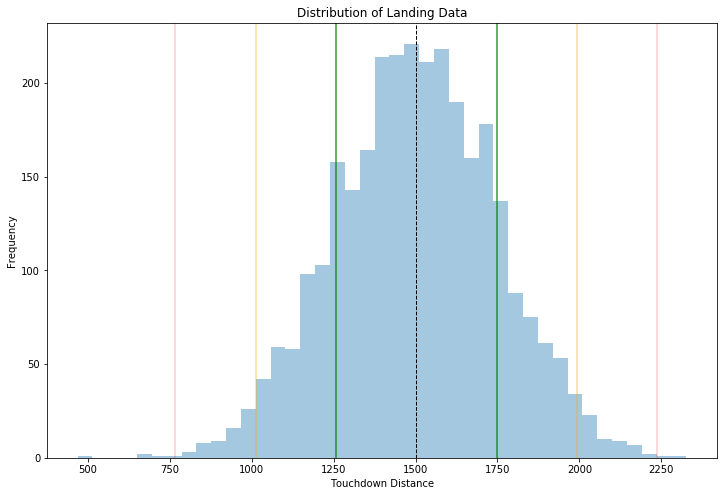

In [462]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(touchdown_pts, kde=False)
#plt.legend()
ax.set_title("Distribution of Landing Data")
ax.set_xlabel("Touchdown Distance")
ax.set_ylabel("Frequency")
plt.axvline(benchmark, color='black', linewidth = 1, linestyle = '--')
plt.axvline(np.std(touchdown_pts)+np.mean(touchdown_pts), color = 'green', alpha = 0.8)
plt.axvline(-1*np.std(touchdown_pts)+np.mean(touchdown_pts), color = 'green',alpha = 0.8)
plt.axvline(-2*np.std(touchdown_pts)+np.mean(touchdown_pts), color = 'orange',alpha = 0.4)
plt.axvline(2*np.std(touchdown_pts)+np.mean(touchdown_pts), color = 'orange',alpha = 0.4)
plt.axvline(-3*np.std(touchdown_pts)+np.mean(touchdown_pts),color = 'red',alpha = 0.2)
plt.axvline(3*np.std(touchdown_pts)+np.mean(touchdown_pts), color = 'red',alpha = 0.2)

In [463]:
print(f'68% of the landings should be within\
 {np.mean(touchdown_pts):.0f} feet of the end of the runway\
 +/- {np.std(touchdown_pts):.0f}')

print(f'95% of the landings should be within\
 {np.mean(touchdown_pts):.0f} feet of the end of the runway\
 +/- {np.std(touchdown_pts*2):.0f}')

print(f'99.7% of the landings should be within\
 {np.mean(touchdown_pts):.0f} feet of the end of the runway\
 +/- {np.std(touchdown_pts*3):.0f}')

68% of the landings should be within 1502 feet of the end of the runway +/- 245
95% of the landings should be within 1502 feet of the end of the runway +/- 490
99.7% of the landings should be within 1502 feet of the end of the runway +/- 736


The above basically tells us that in the real world, since we are not perfect and human behaivor is normally distributed, that 99.7% of Boeing 737NG landings should occur within 751 of the end of the runway and 2,249.  When real data lies outside of this distribution, we should be asking why because that is the signature of increasing risk.

## Now we should plot our real data vs the benchmark distribution to see how well we are doing.

Plotting real data against a benchmark will give you plenty of insights into trends that can be easily identified and you can target your training resources towards mitigating that risk.  Since we are developing an intial framework for creating the analysis and the model we will generate data from random variables.

In [342]:
#Loading the real data 

#data = pd.read_csv("/File Structure")
#data.shape -- this will tell us how many rows and columns that we have.  

#The data should be formatted identically to our benchmark sample data

In [469]:
data = np.zeros((27,100)) # creates an array of 27 rows with 100 columns, or 2700 data points
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i,j] = -376 + mean + (np.random.normal()*(stdev+10))#adjusted the mean and StdDev

print(f'The Mean of the actual data is {np.mean(data):.0f} feet')
print(f'The Standard Deviation of the actual data is {np.std(data):.0f} feet')
print(" ")
print(f'68% of the actual landings are within\
 {np.mean(data):.2f} feet of the end of the runway\
 +/- {np.std(data):.0f} feet')

print(f'95% of the actual landings should be within\
 {np.mean(data):.2f} feet of the end of the runway\
 +/- {np.std(data*2):.0f} feet')

print(f'99.7% of the actual landings should be within\
 {np.mean(data):.2f} feet of the end of the runway\
 +/- {np.std(data*3):.0f} feet')


The Mean of the actual data is 1129 feet
The Standard Deviation of the actual data is 263 feet
 
68% of the actual landings are within 1128.79 feet of the end of the runway +/- 263 feet
95% of the actual landings should be within 1128.79 feet of the end of the runway +/- 526 feet
99.7% of the actual landings should be within 1128.79 feet of the end of the runway +/- 789 feet


### Now we should overlay our current and actual data set to see how we are doing


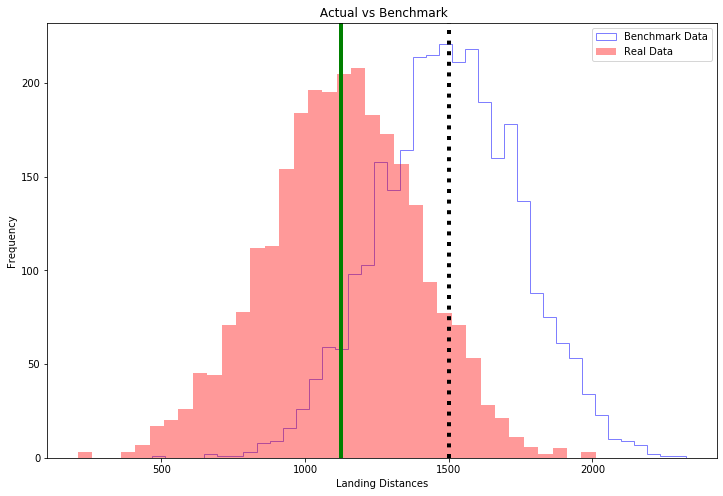

In [466]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(touchdown_pts, color = 'blue', kde = False,
            hist_kws={"histtype": "step", "linewidth": 1,"alpha": .5})

sns.distplot(data, color = 'red', kde = False)
legends = ['Benchmark Data', 'Real Data']
plt.legend(legends)
ax.set_title(" Actual vs Benchmark")
ax.set_xlabel("Landing Distances")
ax.set_ylabel("Frequency")
plt.axvline(benchmark, color = 'black', linestyle = 'dotted', linewidth = 4)
plt.axvline(np.mean(data), color = 'green', linewidth = 4)

### In the comparison of distributions we can see that the actual data offsets the benchmark.  Let's take a look to see by how much and attempt to draw conclusions as to why.

In [346]:
print(f' The mean of the actual data offsets the mean of the benchmark by\
 {abs(np.mean(data) - np.mean(touchdown_pts)):.0f}feet')

 The mean of the actual data offsets the mean of the benchmark by 376feet


### The first measurement of 2,700 landings shows a mean offset of 375 from the benchmark.  This is only one data point.  So before we pull the fire alarm, we need to know if this is a trend.

This one off comparison is not a trend but it is a data point that shows that the standard is not being met.  Is this an indication of risk?  It certainly can be and it should be annotated as risk because the circumstances revolving around this may have been overlooked.  If the trend worsens over time then you should address it.  The following comaprison will give more insight.

Below we are going to skew our distribution for the next data set and see what effect that has on spotting a trend.

In [471]:
#choosing parameters for our skewed distribution
a, loc, scale = -4, 1224, 175
#create 280,000 random variables for our distribution
data_2 = stats.skewnorm(a, loc, scale).rvs(2800)

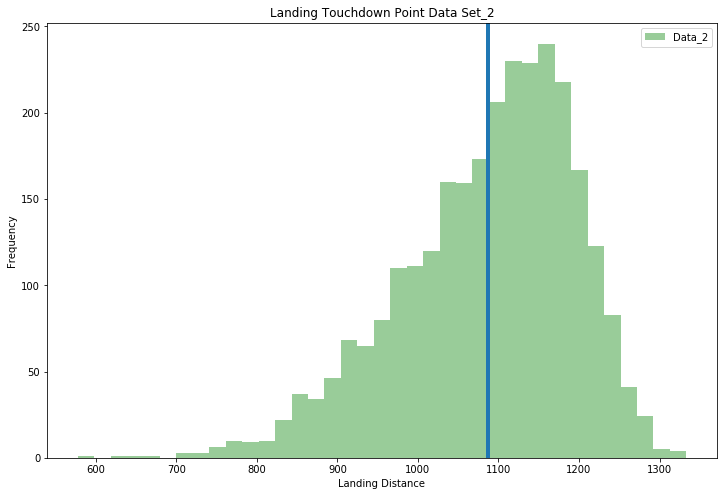

In [472]:
#plotting data set #2
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(data_2, color = 'green', kde = False)
legends = ['Data_2']
plt.legend(legends)
ax.set_title("Landing Touchdown Point Data Set_2")
ax.set_xlabel("Landing Distance")
ax.set_ylabel("Frequency")
plt.axvline(np.mean(data_2),linewidth = 4)

In [473]:
print(f'68% of the actual landings are within\
 {np.mean(data_2):.2f} feet of the end of the runway\
 +/- {np.std(data_2):.0f} feet')

print(f'95% of the actual landings should be within\
 {np.mean(data_2):.2f} feet of the end of the runway\
 +/- {np.std(data_2*2):.0f} feet')

print(f'99.7% of the actual landings should be within\
 {np.mean(data_2):.2f} feet of the end of the runway\
 +/- {np.std(data_2*3):.0f} feet')

68% of the actual landings are within 1086.74 feet of the end of the runway +/- 108 feet
95% of the actual landings should be within 1086.74 feet of the end of the runway +/- 217 feet
99.7% of the actual landings should be within 1086.74 feet of the end of the runway +/- 325 feet


### The above distribution shows that there is a skew in our outcomes. 

The mean of the data has shifted further away from the benchmark and it is skewed to the left.  Lets take a look and see how far.

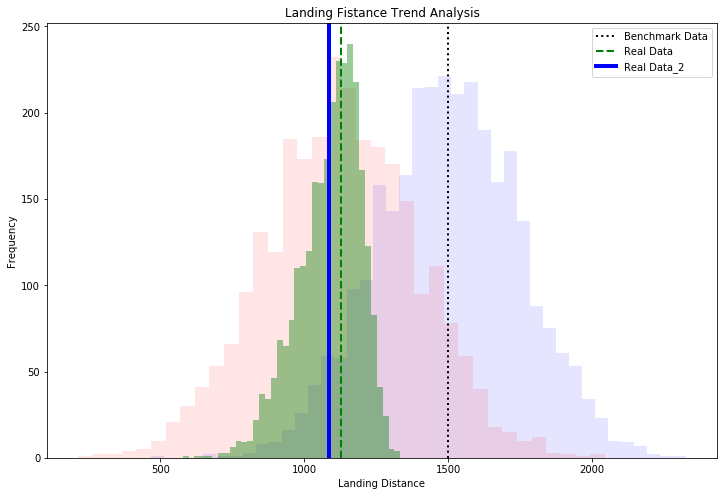

In [475]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(touchdown_pts, color = 'blue', kde = False,
            hist_kws={"histtype": "stepfilled", "linewidth": 1,"alpha": .1})
sns.distplot(data, color = 'red', kde = False,
            hist_kws={"histtype": "stepfilled", "linewidth": 1,"alpha": .1})
sns.distplot(data_2, color = 'green', kde = False)
plt.axvline(benchmark, color = 'black', linestyle = 'dotted', linewidth = 2)
plt.axvline(np.mean(data), color = 'green', linewidth = 2, linestyle = '--' )
plt.axvline(np.mean(data_2), color = 'blue', linewidth = 4)
ax.set_title("Landing Fistance Trend Analysis")
ax.set_xlabel("Landing Distance")
ax.set_ylabel("Frequency")
legends = ['Benchmark Data', 'Real Data', 'Real Data_2']
plt.legend(legends)

In [474]:
print(f' The mean of the actual data offsets the mean of the benchmark by\
 {abs(np.mean(data) - np.mean(touchdown_pts)):.0f}feet')
print(f' The mean of the second data set further offsets the mean of the benchmark by\
 an additional {abs(np.mean(data) - np.mean(data_2)):.0f}feet')


 The mean of the actual data offsets the mean of the benchmark by 373feet
 The mean of the second data set further offsets the mean of the benchmark by an additional 42feet


## We can see above that the trend away from the benchmark distance has increased and is now skewed.

With real world data this can be for a number of reasons.  The ideal circumstance would be to investigate why.  The reasoning could be that for a particular runway analysis there has been a highspeed taxi-way that has been closed and the pilots are electing to land shorter to make a closer turn-off.  This in itself is the definition of defined risk and has led to undesried outcomes in the real world.  Once the risk is discovered through statistical analysis you can quickly react to contain it.

There are many more variables and analyses that can be added to this python model to assist in evaluating risk.